# Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

Считаем данные и подготовим их к дальнейшему анализу

# Чтение данных

In [3]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
# df.head()

/Users/d.m.kulakova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
with pd.option_context('display.max_columns',None):
    display(df.head())
df.info()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


# Чистка данных

Почистим данные

In [5]:
# Столбцы со всеми уникальными значениями можем сразу выкинуть,
# так как всё уже отображено в sub_grade

df = df.drop(['id','policy_code','out_prncp',
              'out_prncp_inv','url','pymnt_plan',
              'hardship_flag','grade'],
             axis=1)

In [6]:
# Столбцы с слишком большим количеством нулевых значений отбрасываются
# Чтобы упростить задачу классификации,
# столбцы должны быть заполнены хотя бы на 90%,
# поэтому сохраняется только около 50 столбцов.

# ((df.isnull().sum()) / len(df) * 100).plot.bar(title='Процент пропущенных значений')

percent = df.isnull().sum() / len(df)
nan_cols = percent.iloc[np.where(np.array(percent) > 0.1)].index
print(len(nan_cols), "- удалено")


59 - удалено


In [7]:
df = df.drop(nan_cols, axis=1)

# Анализ категориальных признаков

Посмотрим на `loan_status`

<AxesSubplot:xlabel='count', ylabel='loan_status'>

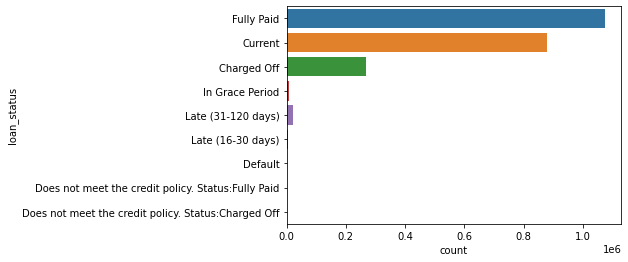

In [8]:
sn.countplot(y='loan_status', data=df)

Нас интересуют только просроченные `Charged Off` и полностью погашенные `Fully Paid` кредиты. Собственно, установим 0 и 1, соответсвенно, остальное - выкинем

In [9]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]
df['label'] = df.apply(lambda r: 1 if r['loan_status'] == 'Fully Paid' else 0, axis=1)
df = df.drop('loan_status', axis=1)

In [10]:
# Категориальные признаки

with pd.option_context('display.max_rows',None):
    display(df.describe(include=np.object).transpose())

/var/folders/3q/mp2g0k9x12xfm2gxv21yby100000gq/T/ipykernel_75327/3721756097.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  display(df.describe(include=np.object).transpose())


,count,unique,top,freq
term,1345310,2,36 months,1020743
sub_grade,1345310,35,C1,85494
emp_title,1259525,378353,Teacher,21268
emp_length,1266799,11,10+ years,442199
home_ownership,1345310,6,MORTGAGE,665579
verification_status,1345310,3,Source Verified,521273
issue_d,1345310,139,Mar-2016,48937
purpose,1345310,14,debt_consolidation,780321
title,1328651,61682,Debt consolidation,660960
zip_code,1345309,943,945xx,15005


Преобразуем все даты в числовые.

In [11]:
#'issue_d'
date_fields = ['issue_d','earliest_cr_line',
               'last_pymnt_d','last_credit_pull_d']

for col in date_fields:  
    df[col] = pd.to_datetime(df[col]) 
    df[col + '_month'] = df[col].dt.month
    df[col + '_year'] = df[col].dt.year

df = df.drop(date_fields, axis=1)

Поля `emp_title` и `title` содержат слишком много различных значений, сохраним только те, которые чаще всего встречаются

In [12]:
per = 0.01

vc = df['title'].value_counts()
titles = vc.iloc[np.where(np.array(vc) > per * len(df))].index
df['title'] = df.apply(lambda r: r['title'] if r['title'] in titles else 'Other title',axis=1)

In [13]:
vc = df['emp_title'].value_counts()
titles = vc.iloc[np.where(np.array(vc) > per * len(df))].index
df['emp_title'] = df.apply(lambda r: r['emp_title'] if r['emp_title'] in titles else 'Other title',axis=1)

In [14]:
# df

Воспользуемся one-hot 

In [15]:
cat = df.select_dtypes(include=['object']).columns
df[cat] = df[cat].fillna(value='Missing')
df_cat = pd.get_dummies(data=df[cat])

Удалим наименее часто встречающие строки, как и `title`

In [16]:
print("Total # categorical columns: ", len(df_cat.columns))
df_cat = df_cat.drop([col for col, cnt in df_cat.sum().iteritems() if cnt < per * len(df_cat)], axis=1)
print("Reduced # categorical columns: ", len(df_cat.columns))

Total # categorical columns:  1086
Reduced # categorical columns:  102


# Анализ числовых данных

Перейдем к числовым признакам

In [17]:
with pd.option_context('display.max_rows',None):
    display(df.describe().transpose().apply(lambda s: s.apply('{0:.5f}'.format)))

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1345310.00000,14419.97201,8717.05079,500.00000,8000.00000,12000.00000,20000.00000,40000.00000
funded_amnt,1345310.00000,14411.55663,8713.11791,500.00000,8000.00000,12000.00000,20000.00000,40000.00000
funded_amnt_inv,1345310.00000,14389.14160,8715.49399,0.00000,7875.00000,12000.00000,20000.00000,40000.00000
int_rate,1345310.00000,13.23962,4.76872,5.31000,9.75000,12.74000,15.99000,30.99000
installment,1345310.00000,438.07553,261.51260,4.93000,248.48000,375.43000,580.73000,1719.83000
annual_inc,1345310.00000,76247.63641,69925.09843,0.00000,45780.00000,65000.00000,90000.00000,10999200.00000
dti,1344936.00000,18.28267,11.16045,-1.00000,11.79000,17.61000,24.06000,999.00000
delinq_2yrs,1345310.00000,0.31779,0.87799,0.00000,0.00000,0.00000,0.00000,39.00000
fico_range_low,1345310.00000,696.18504,31.85251,625.00000,670.00000,690.00000,710.00000,845.00000
fico_range_high,1345310.00000,700.18518,31.85316,629.00000,674.00000,694.00000,714.00000,850.00000


In [18]:
df = df.drop(cat,axis=1)
df = pd.concat([df,df_cat], axis=1)

In [19]:
with pd.option_context('display.max_columns',None):
    display(df.head())
df.info()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,label,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,term_ 36 months,term_ 60 months,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,emp_title_Manager,emp_title_Other title,emp_title_Teacher,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,emp_length_Missing,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_medical,purpose_other,purpose_small_business,title_Credit card refinancing,title_Debt Consolidation,title_Debt consolidation,title_Home improvement,title_Major purchase,title_Medical expenses,title_Other,title_Other title,zip_code_112xx,zip_code_750xx,zip_code_945xx,addr_state_AL,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_IN,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OR,addr_state_PA,addr_state_SC,addr_state_TN,addr_state_TX,addr_state_VA,addr_state_WA,addr_state_WI,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,debt_settlement_flag_N,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,1,12,2015,8,2003,1.0,2019.0,3.0,2019.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1,12,2015,12,1999,6.0,2016.0,3.0,2019.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Columns: 176 entries, loan_amnt to debt_settlement_flag_Y
dtypes: float64(69), int64(5), uint8(102)
memory usage: 900.7 MB


# Итоговый датасет

In [20]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,addr_state_VA,addr_state_WA,addr_state_WI,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,debt_settlement_flag_N,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0,0,0,0,1,1,0,1,1,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0,0,0,0,1,1,0,1,1,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0,0,0,0,1,0,1,1,1,0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0,0,0,0,1,1,0,1,1,0
5,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0,0,0,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,18000.0,18000.0,9.49,377.95,130000.0,20.59,0.0,735.0,739.0,...,0,0,0,1,0,1,0,1,1,0
2260690,29400.0,29400.0,29400.0,13.99,683.94,180792.0,22.03,0.0,705.0,709.0,...,0,0,0,1,0,1,0,1,1,0
2260691,32000.0,32000.0,32000.0,14.49,752.74,157000.0,10.34,0.0,735.0,739.0,...,0,0,0,1,0,1,0,1,1,0
2260692,16000.0,16000.0,16000.0,12.79,362.34,150000.0,12.25,0.0,665.0,669.0,...,0,0,0,1,0,1,0,1,1,0


# Моделирование

Признаки с наибольшей корреляцией

<AxesSubplot:>

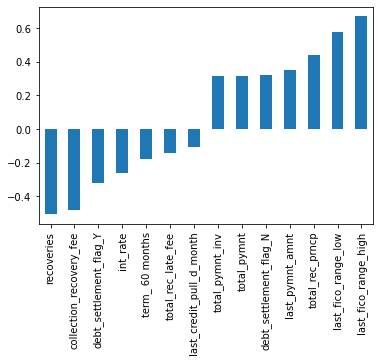

In [22]:
corrs = df.corr()['label'].sort_values(ascending=True).drop('label')
pd.concat([corrs.iloc[:7],corrs.iloc[-7:]],axis=0).plot.bar()

Разделяем данные 

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = df.drop('label',axis=1).values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# # загрузка данных
# data = pd.read_csv('loan_data.csv', index_col='Date', parse_dates=['Date'])
# data = data.dropna() # удаление пропущенных значений

In [28]:
data = df.copy()

In [29]:
# # анализ данных
# autocorrelation_plot(data)
# plt.show()

- В модели ARIMA(order=(p, d, q)) параметры описывают порядок авторегрессии (AR), порядок разности (I) и порядок скользящего среднего (MA) соответственно. В данном случае order=(1, 1, 1) означает, что используется модель ARIMA с одним авторегрессионным, одним разностным и одним скользящим средним параметром.

- Параметры seasonal_order=(P, D, Q, S) в модели SARIMAX обычно используются, когда имеются ярко выраженные сезонные зависимости в данных. P, D и Q аналогичны параметрам ARIMA, а S - количество временных интервалов в сезоне. В данном случае seasonal_order=(1, 0, 0, 12) означает, что в модели используется один сезонный авторегрессионный параметр (P = 1), не используется сезонное дифференцирование (D = 0), не используется сезонный скользящий средний параметр (Q = 0) и сезонность определяется по количеству месяцев в году (S = 12).

In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test = df[-12:]

# Проверка, что индексы начинаются с 0
if forecast.index[0] != 0:
    forecast.reset_index(inplace=True, drop=True)
if test.index[0] != 0:
    test.reset_index(inplace=True, drop=True)

# Проверка, что есть достаточно элементов
if len(forecast) > 0 and len(test) > 0:
    # Расчет метрик
    if len(forecast) > len(test):
        forecast = forecast[:len(test)]
    elif len(test) > len(forecast):
        test = test[:len(forecast)]
    mae = mean_absolute_error(test['loan_amnt'], forecast)
    mse = mean_squared_error(test['loan_amnt'], forecast)
    r2 = r2_score(test['loan_amnt'], forecast)
else:
    print('Ошибка: недостаточно элементов в переменных forecast или test.')

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Вывод:
MAE: 1989.2931235669745
MSE: 11482078.347245983
R2: 0.9613848870311228

MAE: 9761.207347318743
MSE: 162031927.76585966
R2: -1.102952782860616


In [34]:
print(test)

         loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
2260674    20000.0      20000.0          20000.0     15.59       482.02   
2260675    16000.0      16000.0          16000.0     10.99       347.80   
2260677    11200.0      11200.0          11200.0     13.49       257.66   
2260680    40000.0      40000.0          39975.0     15.59       964.03   
2260684    15000.0      15000.0          15000.0     10.49       487.47   
2260685    36400.0      36400.0          36400.0     14.49       856.24   
2260686    23800.0      23800.0          23800.0     14.49       559.85   
2260688    18000.0      18000.0          18000.0      9.49       377.95   
2260690    29400.0      29400.0          29400.0     13.99       683.94   
2260691    32000.0      32000.0          32000.0     14.49       752.74   
2260692    16000.0      16000.0          16000.0     12.79       362.34   
2260697    24000.0      24000.0          24000.0     14.49       564.56   

         annual_inc    d

In [40]:
!pip install arch

     |████████████████████████████████| 893 kB 923 kB/s eta 0:00:01


In [51]:
import arch
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Обучение модели
model = ExponentialSmoothing(data['loan_amnt'], seasonal='add', seasonal_periods=12).fit()

# Прогноз на тестовой выборке
forecast = model.forecast(len(test))

# Расчет метрик
mae = mean_absolute_error(test['loan_amnt'].values, forecast)
mse = mean_squared_error(test['loan_amnt'].values, forecast)
r2 = r2_score(test['loan_amnt'].values, forecast)

print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R2:", round(r2, 2))

/Users/d.m.kulakova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/d.m.kulakova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/d.m.kulakova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Users/d.m.kulakova/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


MAE: 8653.51
MSE: 100114832.64
R2: -0.32


In [57]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,addr_state_VA,addr_state_WA,addr_state_WI,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,disbursement_method_Cash,debt_settlement_flag_N,debt_settlement_flag_Y
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,0,0,0,0,1,1,0,1,1,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,0,0,0,0,1,1,0,1,1,0
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0,0,0,0,1,0,1,1,1,0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,0,0,0,0,1,1,0,1,1,0
5,11950.0,11950.0,11950.0,13.44,405.18,34000.0,10.20,0.0,690.0,694.0,...,0,0,0,0,1,1,0,1,1,0
